In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('../평균_표준편차.xlsx', sheet_name = 2, header=None)
df.drop(columns=[0], inplace=True)

cluster = ['군집0', '군집1', '군집2', '군집3']
sectors = list(pd.unique(df[2]))

df[1].value_counts()

df.loc[df[1] == 66588, 1] = np.nan
df.loc[df[1] == 38340, 1] = np.nan
df.loc[df[1] == 7548, 1] = np.nan
df.loc[df[1] == 53096, 1] = np.nan

df = df.fillna(method='ffill')

df = df.astype({5:'string'})
df.info()

df[6] = df[2] + '_risky_' + df[5]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       22 non-null     object 
 1   2       22 non-null     object 
 2   3       22 non-null     int64  
 3   4       22 non-null     float64
 4   5       22 non-null     string 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 1012.0+ bytes


,1,2,3,4,5,6
0,군집0,서비스업,14956,0.224605,0,서비스업_risky_0
1,군집0,서비스업,4968,0.074608,1,서비스업_risky_1
2,군집0,외식업,34836,0.523157,0,외식업_risky_0
3,군집0,외식업,5744,0.086262,1,외식업_risky_1
4,군집0,유통업,4224,0.063435,0,유통업_risky_0
5,군집0,유통업,1860,0.027933,1,유통업_risky_1
6,군집1,서비스업,5028,0.131142,0,서비스업_risky_0
7,군집1,서비스업,1852,0.048305,1,서비스업_risky_1
8,군집1,외식업,23792,0.620553,0,외식업_risky_0
9,군집1,외식업,4416,0.115180,1,외식업_risky_1


In [11]:
def visualize(cluster_group):
    cluster = df.loc[(df[1] == cluster_group)]
    palette = sns.color_palette("pastel")
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(15, 9))
    
    plt.subplot(1,3,1)
    sizes = cluster[3]
    labels = cluster[6]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 전체')
    
    plt.subplot(1,3,2)
    sizes = cluster.loc[df[5] == '0'][3]
    labels = cluster.loc[df[5] == '0'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 비 경영위기')
    
    plt.subplot(1,3,3)
    sizes = cluster.loc[df[5] == '1'][3]
    labels = cluster.loc[df[5] == '1'][2]
    plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=0, colors=palette)
    plt.title(f'{cluster_group}의 경영위기')
    
    plt.tight_layout()
    
    dir_path = f'./업종_대분류_시각화'
    
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    plt.savefig(f'./업종_대분류_시각화/{cluster_group}의 업종별 분포.png')
    
    plt.show()    
    

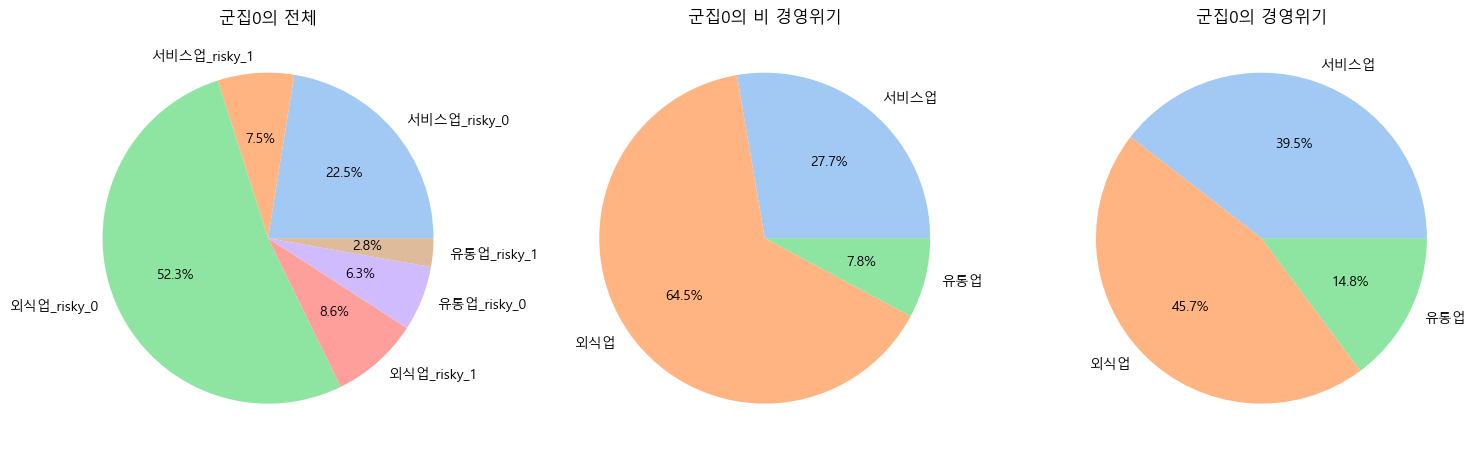

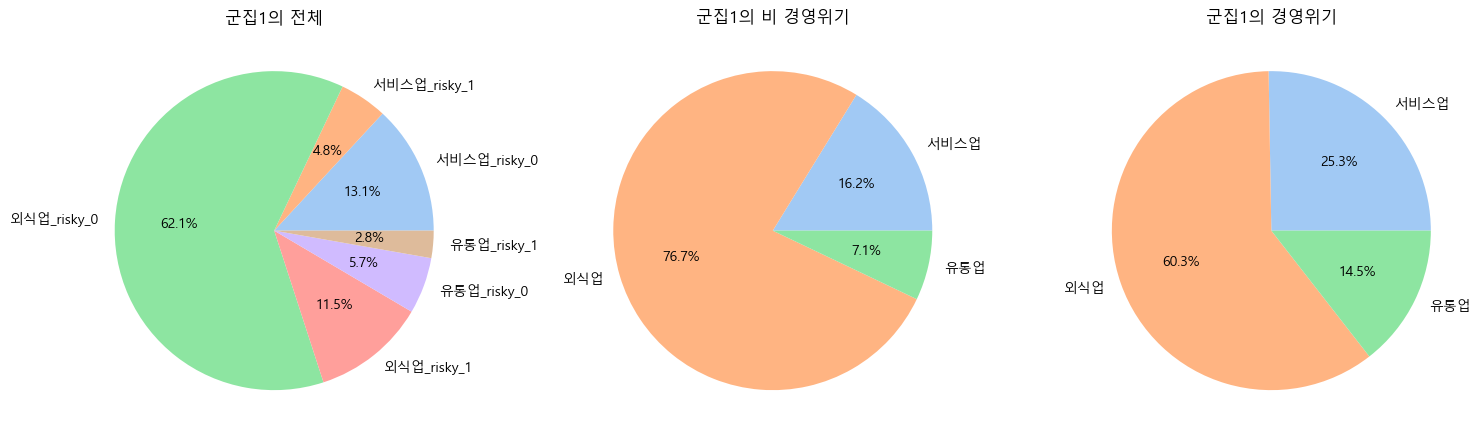

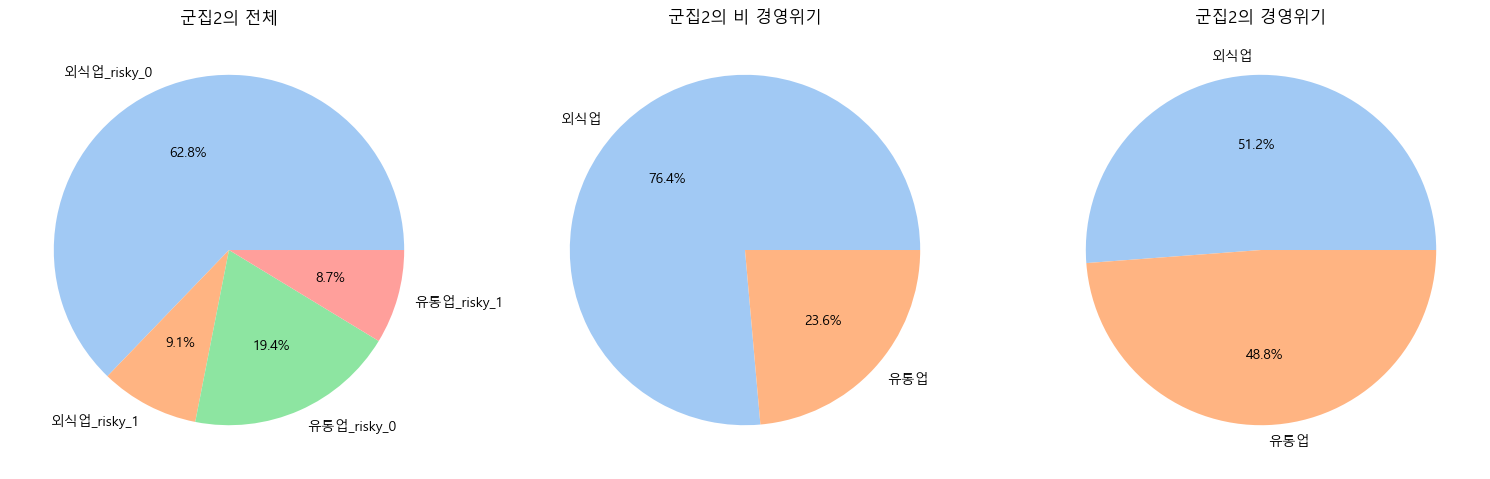

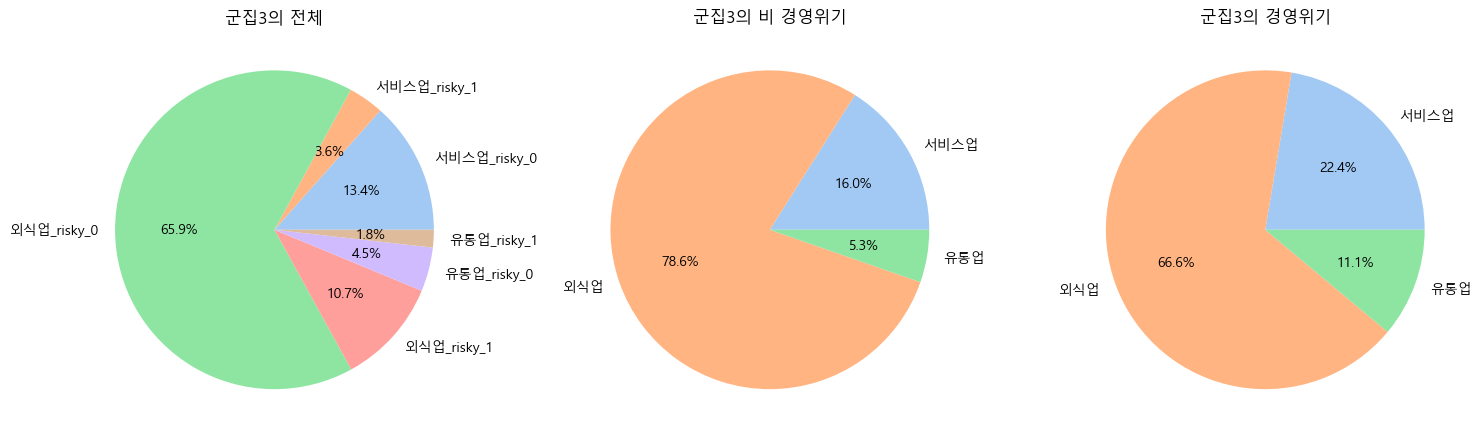

In [12]:
clusters = ['군집0', '군집1', '군집2', '군집3']

for cluster in clusters:
    visualize(cluster)